In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
data=pd.read_csv("MonthWiseMarketArrivals_clean.csv")

In [4]:
data.date = pd.DatetimeIndex(data.date)

In [5]:
data.index.name = None

In [6]:
data.index = pd.PeriodIndex(data.date, freq="M")
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2005-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
2006-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2010-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
2011-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
2012-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [7]:
data.rename(columns={"date":"orderdate"},inplace=True)

In [8]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,orderdate
date,,,,,,,,,,
2005-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
2006-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2010-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
2011-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
2012-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [9]:
data= data.sort_values("orderdate")

In [10]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,orderdate
date,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


In [11]:
mum= data.loc[data.city == "MUMBAI"].copy()
mum.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,orderdate
date,,,,,,,,,,
2004-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
2004-02,MUMBAI,February,2004,239350,614,834,736,MS,MUMBAI,2004-02-01
2004-03,MUMBAI,March,2004,238000,436,557,498,MS,MUMBAI,2004-03-01
2004-04,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI,2004-04-01
2004-05,MUMBAI,May,2004,166430,357,466,405,MS,MUMBAI,2004-05-01


In [12]:
mum = mum.drop(["market","month","year","priceMin","priceMax","state","city"], axis=1)
mum.head()

,quantity,priceMod,orderdate
date,,,
2004-01,267100,849,2004-01-01
2004-02,239350,736,2004-02-01
2004-03,238000,498,2004-03-01
2004-04,198200,397,2004-04-01
2004-05,166430,405,2004-05-01


In [13]:
mum.groupby('orderdate')['quantity'].sum().reset_index()

,orderdate,quantity
0,2004-01-01,267100
1,2004-02-01,239350
2,2004-03-01,238000
3,2004-04-01,198200
4,2004-05-01,166430
...,...,...
141,2015-10-01,284078
142,2015-11-01,308071
143,2015-12-01,302409
144,2016-01-01,413681


In [14]:
print(mum['orderdate'].min())
print(mum['orderdate'].max())

2004-01-01 00:00:00
2016-02-01 00:00:00


In [15]:
mum= mum.set_index('orderdate')
mum.index

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01'],
              dtype='datetime64[ns]', name='orderdate', length=146, freq=None)

In [16]:
y = mum['quantity'].resample('MS').mean()
y['2016':]

orderdate
2016-01-01    413681.0
2016-02-01    187100.0
Freq: MS, Name: quantity, dtype: float64

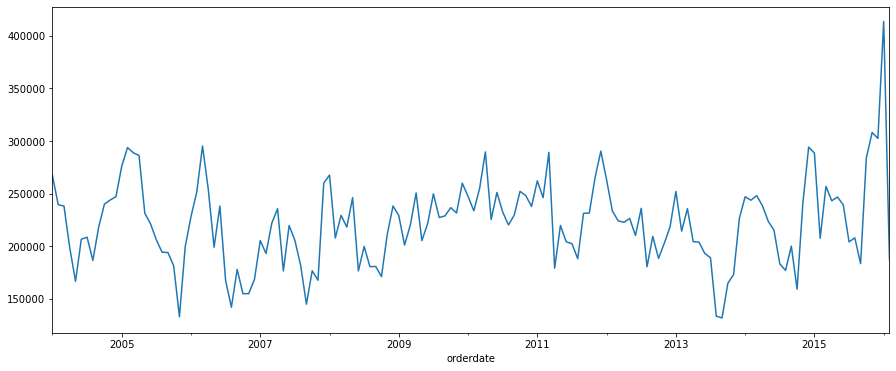

In [17]:
y.plot(figsize = (15, 6))
plt.show()

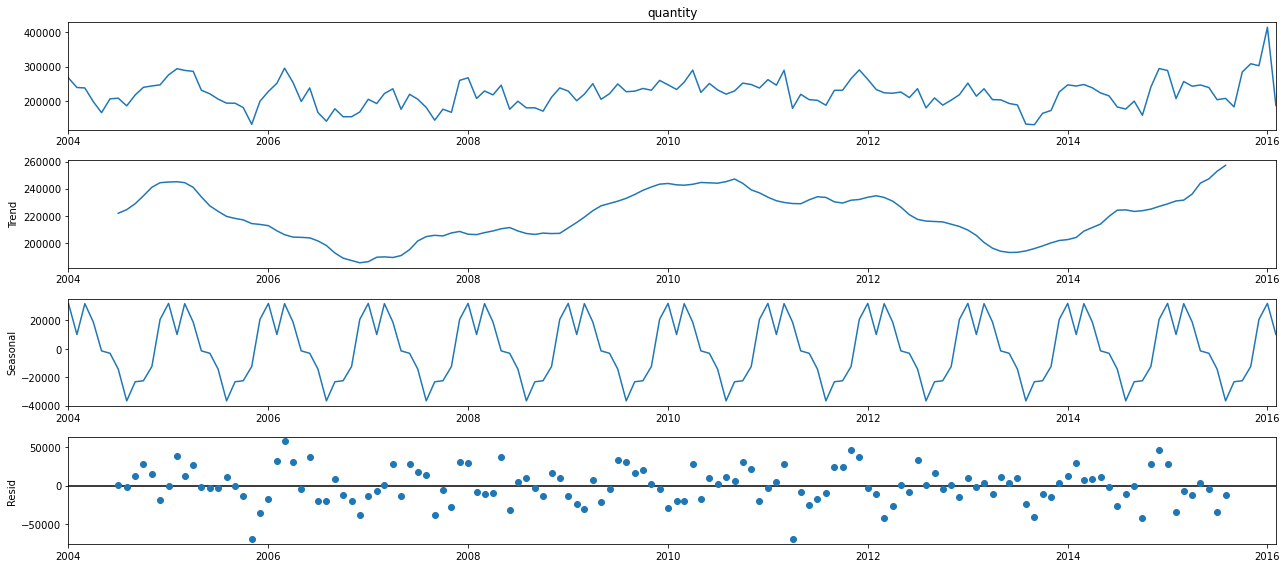

In [18]:
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

In [19]:
model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2042      0.182     -1.121      0.262      -0.561       0.153
ma.L1         -0.3677      0.177     -2.073      0.038      -0.715      -0.020
ar.S.L12      -0.3571      0.073     -4.862      0.000      -0.501      -0.213
sigma2      1.493e+09   3.69e-11   4.05e+19      0.000    1.49e+09    1.49e+09


C:\Users\KAILASH\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


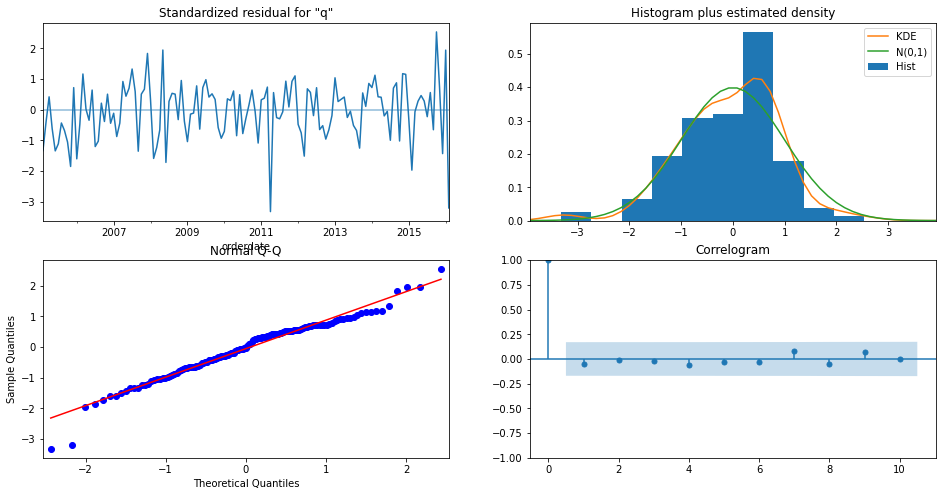

In [20]:
result.plot_diagnostics(figsize = (16, 8))
plt.show()

In [21]:
prediction = result.get_prediction(start = pd.to_datetime('2016-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

C:\Users\KAILASH\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


,lower quantity,upper quantity
orderdate,,
2016-01-01,262731.553078,414202.246071
2016-02-01,235015.105263,386485.798256


In [38]:
y_hat = prediction.predicted_mean
y_truth = y['2016-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
air.shapeprint('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 10473297561.55


NameError: name 'air' is not defined

In [27]:
mum.shape

(146, 2)

In [28]:
train=mum.iloc[:133]

In [29]:
test=mum.iloc[133:]

In [30]:
train.shape

(133, 2)

In [31]:
test.shape

(13, 2)

In [32]:
trainx=train.iloc[-1]

In [33]:
trainx

quantity    288460
priceMod      1443
Name: 2015-01-01 00:00:00, dtype: int64

In [34]:
test["priceMod "]=trainx[-1]

C:\Users\KAILASH\AppData\Local\Temp/ipykernel_2364/858310139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["priceMod "]=trainx[-1]


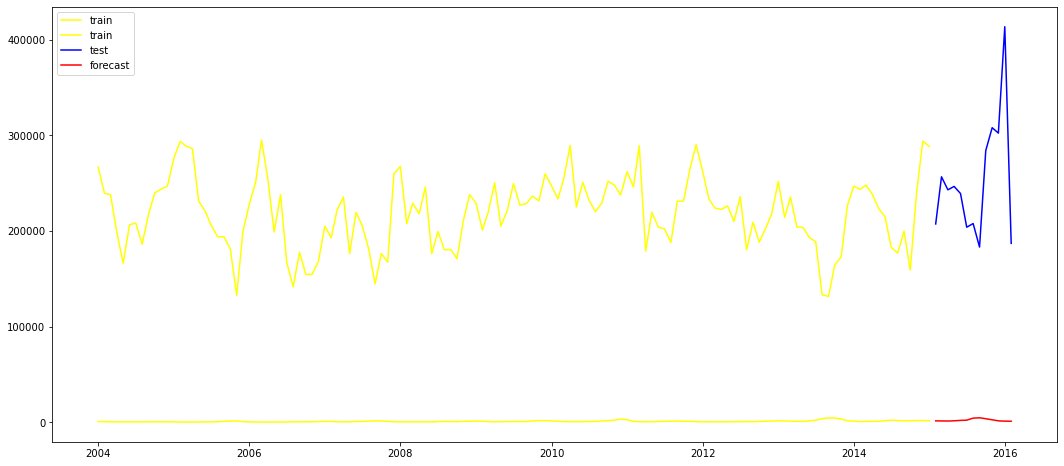

In [35]:
plt.plot(train,"yellow",label='train')
plt.plot(test.quantity,"b-",label='test')
plt.plot(test.priceMod ,"red",label="forecast")
plt.legend()